In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('house_clean.csv')

In [2]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'month', 'day'],
      dtype='object')

                                                             VISUALIZATION

In [3]:
print("day wise house details records.")
print("-----------------------------")
summary = df.groupby(['day']).agg(average_price=('price', 'mean')).reset_index()
print(summary)

day wise house details records.
-----------------------------
    day  average_price
0     1  473469.386008
1     2  478916.103404
2     3  461132.650576
3     4  461917.499480
4     5  495520.460139
5     6  468993.521164
6     7  462482.940532
7     8  447063.991095
8     9  458518.671367
9    10  481122.026534
10   11  480038.372372
11   12  491179.930182
12   13  490188.782631
13   14  463170.438202
14   15  456853.451100
15   16  469619.943727
16   17  447302.536254
17   18  461909.143685
18   19  452292.467521
19   20  471148.500869
20   21  438907.970405
21   22  461911.715884
22   23  446915.250075
23   24  464967.453912
24   25  452208.103416
25   26  457228.906010
26   27  452250.098122
27   28  458593.338046
28   29  452638.428080
29   30  467483.245700
30   31  563973.000000


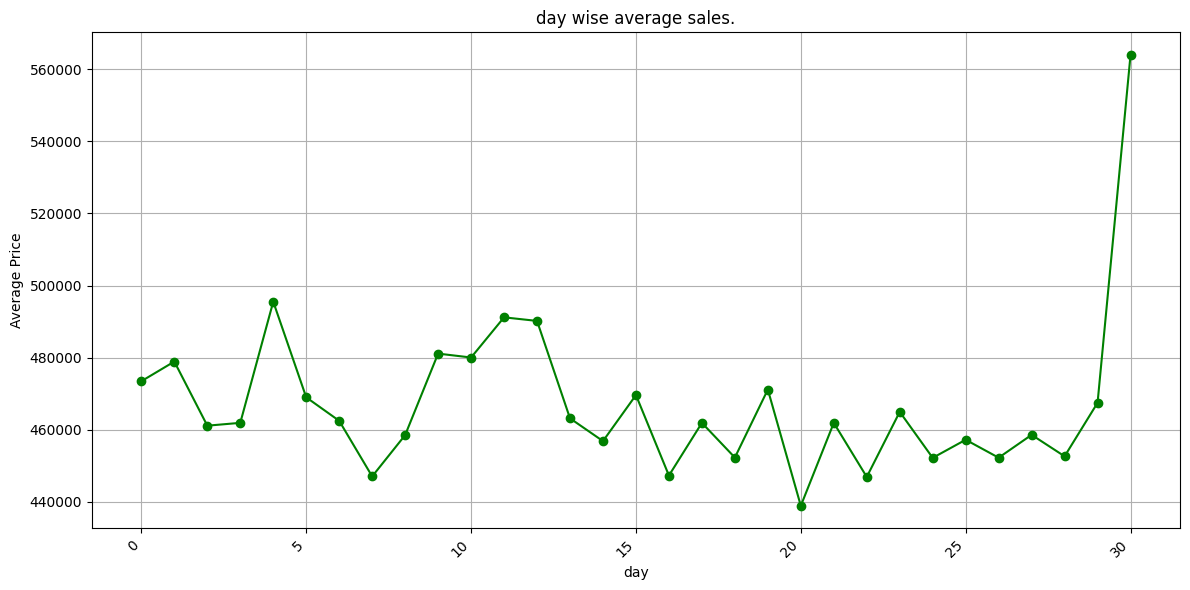

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(summary.index, summary['average_price'], marker='o', linestyle='-', color='green')
plt.title('day wise average records.')
plt.xlabel('day')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
print("month wise average records.")
print("-----------------------------")
summary = df.groupby(['year', 'month']).agg(average_price=('price', 'mean')).reset_index()
print(summary)

month wise average sales.
-----------------------------
   year  month  average_price
0  2014      5  459557.624697
1  2014      6  466401.945253
2  2014      7  472995.194518


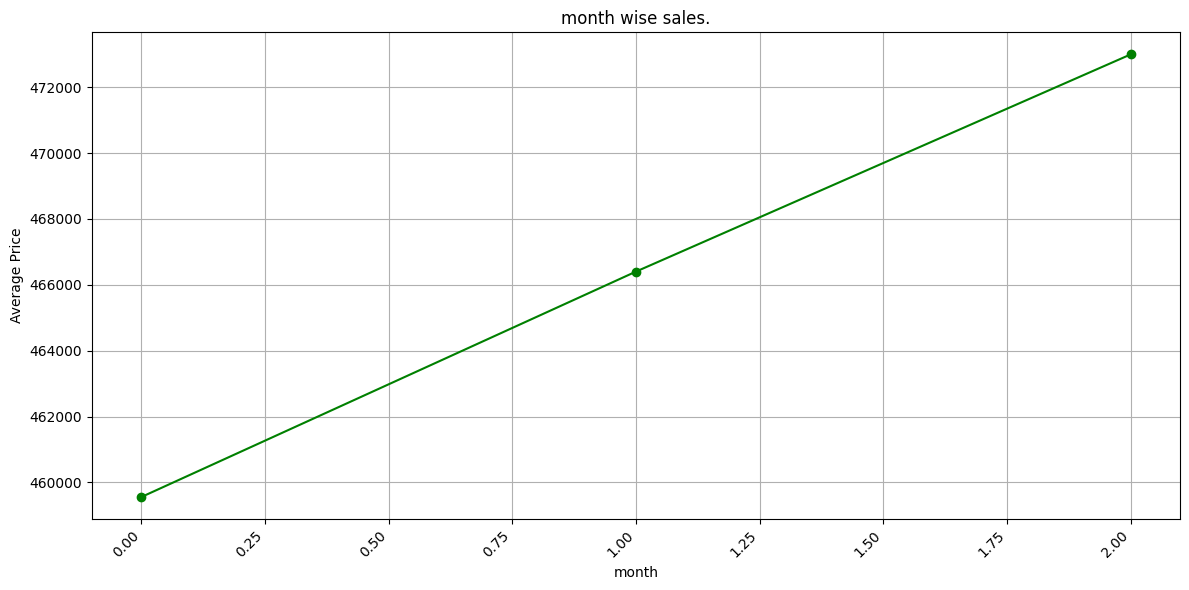

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(summary.index, summary['average_price'], marker='o', linestyle='-', color='green')
plt.title('month wise records.')
plt.xlabel('month')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
print("Year wise average house price.")
print("-----------------------------")
summary=df.groupby('yr_built').agg(average_price=('price','mean'))
print(summary)

Year wise average sales price.
-----------------------------
          average_price
yr_built               
1900      501636.363636
1901      508531.250000
1902      617025.000000
1903      457910.000000
1904      501933.333333
...                 ...
2010      513117.321429
2011      452205.555554
2012      472350.747476
2013      579179.252306
2014      523798.771368

[115 rows x 1 columns]


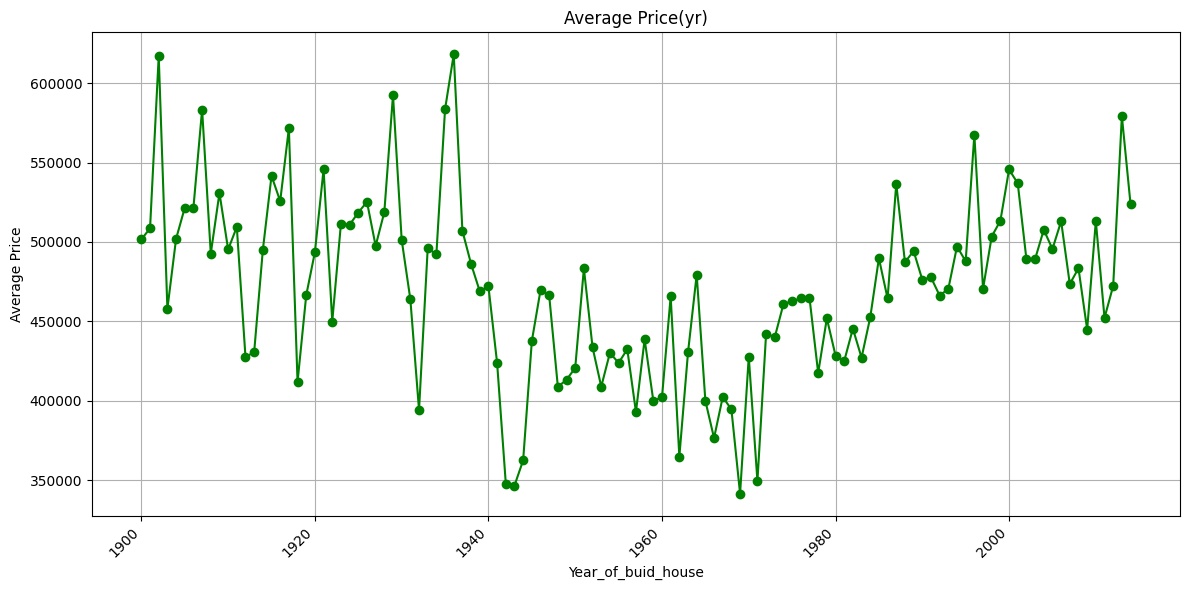

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(summary.index, summary['average_price'], marker='o', linestyle='-', color='green')
plt.title('Average Price(yr)')
plt.xlabel('Year_of_buid_house')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from geopy.geocoders import Nominatim
import time

summary = df.groupby('city').agg(average_price_per_sqft=('price_per_sqft', 'mean')).reset_index()

geolocator = Nominatim(user_agent="geoapi")
summary['lat'] = None
summary['lon'] = None

for i, city in summary.iterrows():
    try:
        location = geolocator.geocode(f"{city['city']},USA")
        if location:
            summary.at[i, 'lat'] = location.latitude
            summary.at[i, 'lon'] = location.longitude
        time.sleep(1) 
    except:
        continue



In [6]:
summary.head()

,city,average_price_per_sqft,lat,lon
0,Algona,129.128000,43.069966,-94.233019
1,Auburn,161.137500,32.609857,-85.480783
2,Beaux Arts Village,500.000000,47.58547,-122.199768
3,Bellevue,265.311748,47.614422,-122.192337
4,Black Diamond,242.792222,47.308308,-122.003758


In [7]:
data=summary

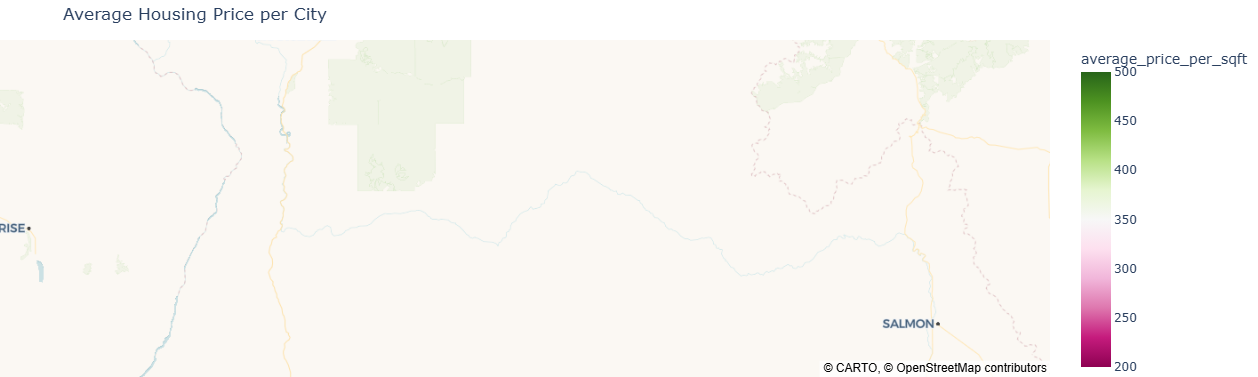

In [8]:
import plotly.express as px
fig = px.scatter_map(
    data,
    lat="lat",
    lon="lon",
    size="average_price_per_sqft",
    color="average_price_per_sqft",
    hover_name="city",
    hover_data=["average_price_per_sqft"],
    color_continuous_scale="PiYG",  
    range_color=[200, 500], 
    size_max=30,
    zoom=8,
    title="Average Housing Price per City"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,day
0,2014-05-02,313000.0,3,1,1340.0,7560.0,1,no,No,average,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2
1,2014-05-02,469000.0,5,2,3650.0,9466.5,2,no,excellent,excellent,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2
2,2014-05-02,342000.0,3,2,1930.0,7560.0,1,no,No,good,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2
3,2014-05-02,420000.0,3,2,2000.0,7560.0,1,no,No,good,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2
4,2014-05-02,550000.0,4,2,1940.0,8265.0,1,no,No,good,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2


In [7]:
print("Year wise average house price.")
print("-----------------------------")
summary=df.groupby('yr_renovated').agg(average_price=('price','mean'))
print(summary)

Year wise average house price.
-----------------------------
              average_price
yr_renovated               
0             474142.312517
1912          472350.747476
1913          440000.000000
1923          574094.937488
1934          533691.666667
1945          471857.142857
1948          410000.000000
1953          270000.000000
1954          443033.333337
1955          474500.000000
1956          559353.333333
1958          415500.000000
1960          160000.000000
1963          281835.833333
1966          750500.000000
1968          457311.111111
1969          335631.818182
1970          689628.205133
1971          470911.000000
1972          388685.336135
1974          467083.333333
1975          553948.314560
1977          346750.000000
1978          500000.000000
1979          413545.770834
1980          571250.000000
1981          630000.000000
1982          396896.707509
1983          416087.763770
1984          552394.831456
1985          474739.655172
1986          5

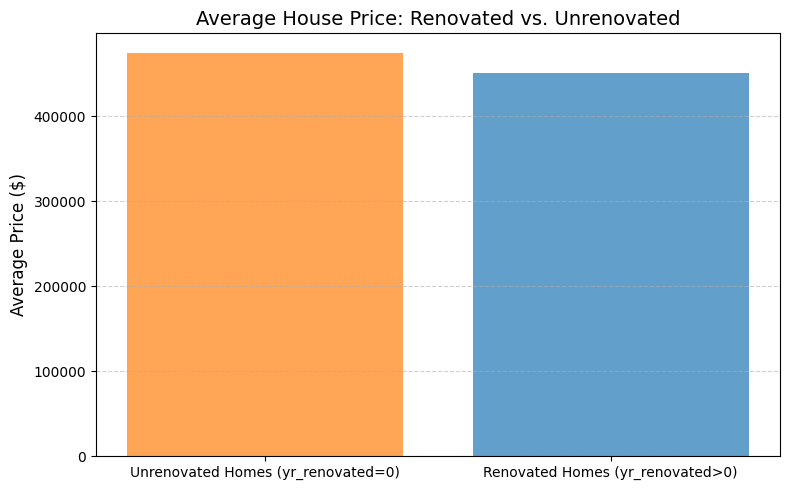

In [14]:
unrenovated_avg = df[df['yr_renovated'] == 0]['price'].mean()
renovated_avg = df[df['yr_renovated'] > 0]['price'].mean()
plt.figure(figsize=(8, 5))
categories = ['Unrenovated Homes (yr_renovated=0)', 'Renovated Homes (yr_renovated>0)']
prices = [unrenovated_avg, renovated_avg]
colors = ['#ff7f0e', '#1f77b4']

bars = plt.bar(categories, prices, color=colors, alpha=0.7)
"""
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom')
"""
plt.title('Average House Price: Renovated vs. Unrenovated', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()